

# Project: TMDB Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The columns in this dataset include: id, imdb_id, popularity, budget, revenue', 'original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.

### Question(s) for Analysis
Some of the questions to be explord in this analysis include:
What is the most popular genre?
What is the most popular movie?
What is the total number of movie released each year?
What is the total number of genres released each year?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# read file as csv
df= pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.shape

(10866, 21)


### Data Cleaning


In [8]:
# make duplicates of the files
df_clean = df.copy()
df_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# drop columns not needed
df_clean.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis = 1, inplace = True)

In [10]:
df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [12]:
df_clean.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
df_clean.duplicated().sum()

1

In [14]:
df_clean.drop_duplicates(inplace = True)

In [15]:
df_clean.duplicated().sum()

0

In [16]:
#drop row
df_clean.dropna(inplace = True)

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [18]:
# change data type 
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

In [19]:
df_clean['revenue'] = df_clean['revenue'].astype('int')

In [20]:
df_clean['budget'] = df_clean['budget'].astype('int')

In [21]:
df_clean['id']= df_clean['id'].astype('str')

In [22]:
# finding the mean popularity for each year
pop_year = df_clean.groupby(['release_year'])['popularity'].mean()
pop_year

release_year
1960    0.458932
1961    0.430438
1962    0.465245
1963    0.502706
1964    0.421091
1965    0.352522
1966    0.308457
1967    0.511007
1968    0.506612
1969    0.441299
1970    0.341638
1971    0.448112
1972    0.469449
1973    0.494462
1974    0.469544
1975    0.533266
1976    0.476533
1977    0.647046
1978    0.430003
1979    0.597555
1980    0.519920
1981    0.455818
1982    0.547968
1983    0.555111
1984    0.611105
1985    0.596628
1986    0.541604
1987    0.535698
1988    0.491846
1989    0.585155
1990    0.553660
1991    0.515138
1992    0.606111
1993    0.560883
1994    0.696182
1995    0.728288
1996    0.618728
1997    0.703757
1998    0.662964
1999    0.673304
2000    0.601602
2001    0.771896
2002    0.750044
2003    0.768583
2004    0.825507
2005    0.677563
2006    0.665477
2007    0.639138
2008    0.631046
2009    0.653179
2010    0.721896
2011    0.744465
2012    0.682239
2013    0.701336
2014    0.962285
2015    1.139736
Name: popularity, dtype: float64

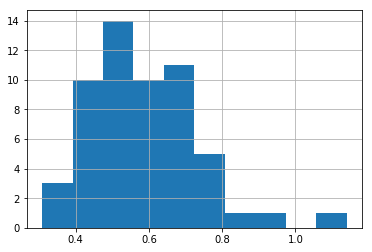

In [23]:
pop_year.hist();

In [24]:
genre_year = df_clean.groupby(['release_year'])['genres']
genre_year

In [25]:
df_clean[['genres']]

,genres
0,Action|Adventure|Science Fiction|Thriller
1,Action|Adventure|Science Fiction|Thriller
2,Adventure|Science Fiction|Thriller
3,Action|Adventure|Science Fiction|Fantasy
4,Action|Crime|Thriller
...,...
10861,Documentary
10862,Action|Adventure|Drama
10863,Mystery|Comedy
10864,Action|Comedy


In [26]:

df_clean.groupby('genres').sum()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Action,35.964776,1345556269,2331375459,5779,8899,312.4,114394,1.437205e+09,2.446612e+09
Action|Adventure,10.062176,346500000,477554742,1473,2581,74.9,28029,4.225138e+08,8.401567e+08
Action|Adventure|Animation,1.818651,0,0,321,301,27.1,8044,0.000000e+00,0.000000e+00
Action|Adventure|Animation|Comedy|Drama,0.370019,0,16627188,88,30,5.6,2006,0.000000e+00,1.798512e+07
Action|Adventure|Animation|Comedy|Family,0.063246,0,0,82,17,6.1,2002,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
Western|Drama|Crime|Romance,0.393664,0,1031243,96,91,5.8,2013,0.000000e+00,9.652778e+05
Western|History,0.128234,10000000,15795189,99,17,6.0,1980,2.646037e+07,4.179465e+07
Western|History|War,0.948560,145000000,25819961,137,60,5.9,2004,1.673946e+08,2.980774e+07


In [27]:
# create a column named profit
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']
df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 17 columns):
id                      9772 non-null object
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
profit                  9772 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Movie with the highest and lowest profit?)

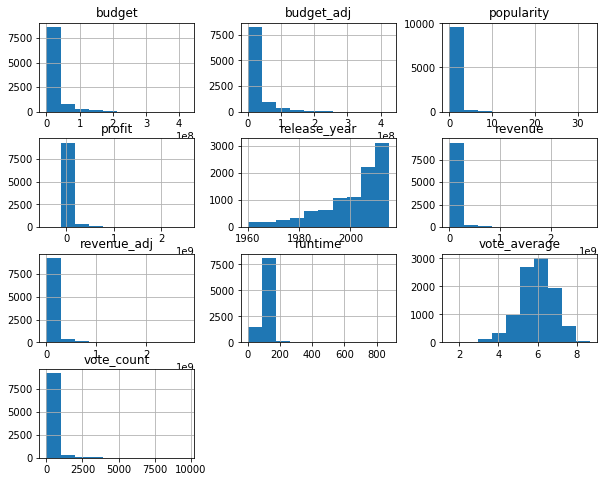

In [29]:
df_clean.hist(figsize =(10,8));

In [30]:
df_clean['runtime'].mean()

102.92662709783053

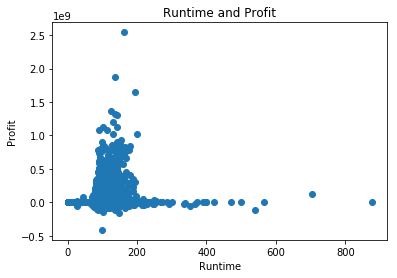

In [31]:
#plot of profit againt runtime
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.title('Runtime and Profit')
plt.scatter(df_clean['runtime'],df_clean['profit'])
plt.show()

In [32]:
# row details of the movie with the longest runtime
df_clean.loc[df_clean['runtime'].idxmax()]

id                                                                 150004
popularity                                                       0.469332
budget                                                                  0
revenue                                                                 0
original_title                                                      Taken
cast                    Dakota Fanning|Matt Frewer|Eric Close|Emily Be...
director                Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...
runtime                                                               877
genres                                                    Science Fiction
production_companies                                           DreamWorks
release_date                                          2002-12-02 00:00:00
vote_count                                                             38
vote_average                                                          6.8
release_year                          

In [33]:
# row details of the movie with the shortest runtime
df_clean.loc[df_clean['runtime'].idxmin()]

id                                                                 370687
popularity                                                        1.87604
budget                                                                  0
revenue                                                                 0
original_title                                   Mythica: The Necromancer
cast                    Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director                                                    A. Todd Smith
runtime                                                                 0
genres                                           Fantasy|Action|Adventure
production_companies    Arrowstorm Entertainment|Camera 40 Productions...
release_date                                          2015-12-19 00:00:00
vote_count                                                             11
vote_average                                                          5.4
release_year                          

In [34]:
# row details of the movie with the highest profit
df_clean.loc[df_clean['profit'].idxmax()]

id                                                                  19995
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                          

In [35]:
# row details of the movie with the lowest profit
df_clean.loc[df_clean['profit'].idxmin()]

id                                                                  46528
popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                          

### Research Question 2  (Most popular movie?)

In [36]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [37]:

df_clean['popularity'].mean()

0.6947209193614408

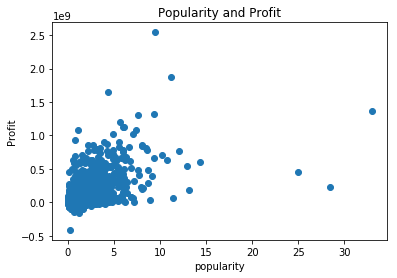

In [38]:
# plot the profit against popularity
plt.xlabel('popularity')
plt.ylabel('Profit')
plt.title('Popularity and Profit')
plt.scatter(df_clean['popularity'],df_clean['profit'])
plt.show()

### Research Question 3  (Movie Released each year?)

In [39]:
year_count = df_clean.groupby('release_year').count()['id']
year_count

release_year
1960     32
1961     30
1962     30
1963     34
1964     41
1965     34
1966     44
1967     36
1968     37
1969     29
1970     40
1971     55
1972     37
1973     55
1974     44
1975     42
1976     46
1977     55
1978     61
1979     56
1980     73
1981     78
1982     80
1983     77
1984     99
1985    106
1986    109
1987    113
1988    132
1989    128
1990    126
1991    125
1992    126
1993    172
1994    174
1995    170
1996    196
1997    180
1998    191
1999    212
2000    196
2001    212
2002    241
2003    254
2004    253
2005    323
2006    350
2007    389
2008    441
2009    474
2010    420
2011    456
2012    498
2013    567
2014    635
2015    558
Name: id, dtype: int64

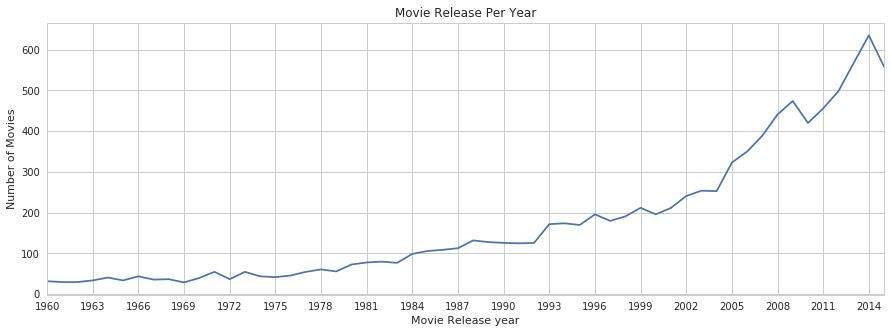

In [47]:
year_count.plot(xticks = np.arange(1960,2016,3))
sns.set(rc={'figure.figsize':(14,5)})
plt.xlabel('Movie Release year')
plt.ylabel('Number of Movies')
plt.title('Movie Release Per Year')
sns.set_style("whitegrid")
plt.show()

From the Movie released per year plot, it is obvious that they was rapid increase in movies released from 2004, and the year with the most movie released, was recorded in 2014.

### Research Question 4  (Total number of each genre released?)

In [41]:
# a function to split multiple values in each column to individual values
def sep(x):  
    df_plot = df_clean[x].str.cat(sep = '|')
    df_p = pd.Series(df_plot.split('|'))
    info = df_p.value_counts(ascending=False)
    return info


In [42]:
movie_genre = sep('genres')
print(movie_genre)

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
dtype: int64


Text(0,0.5,'Number of Movie Genre')

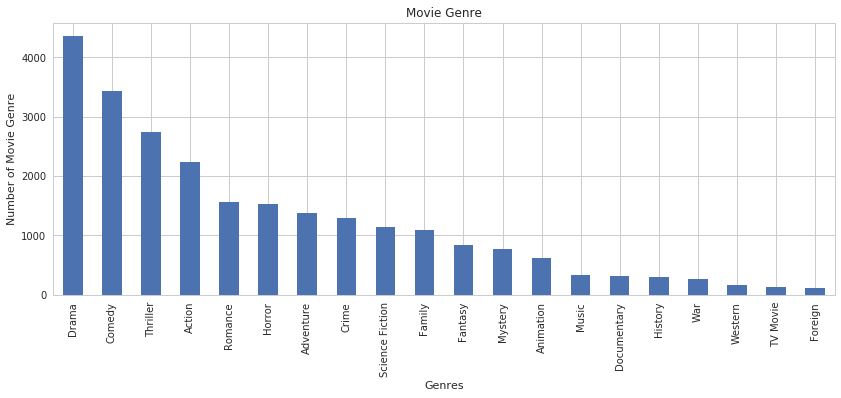

In [43]:
movie_genre.plot(kind= 'bar')
plt.title('Movie Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movie Genre')

From the Movie Genre graph, the genre with the most movie released is Drama. Over 4,000 Drama movies were released.

<a id='conclusions'></a>
## Conclusions

The Avatar movie recorded the highest profit, while The Warrior's Way recorded the most loss. The movie genre with the most number of movies released is the drama movie genre. And 2014 has the most number of movies recorded.

## Limitations

The dataset is not up to date, as the last year recorded was in 2015. This analysis is based on events between 1960 and 2015 and so, this analysis doesn't capture the most current movies and their details.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])